In [ ]:
#  Lark Technologies

#  Data Analyst Take Home Assignment

#  September 4, 2018

#  1 Instructions
#  As Lark users in the diabetes prevention problem interact with the app they are
#  exposed to contant we call “missions”. A mission is a set of conversations about
#  a single topic (e.g. get active, eat well, manage stress) which requires at least 5
#  completed conversations before a user can move to the next mission. The order
#  of the missions is the same for all users. Note that not all conversations are
#  about the mission, and therefore do not count as one of those 5. Moreover, a
#  user can not see more than one mission related conversation per day, therefore
#  one cannot complete a mission in less than 5 days.
#  We are interested in understanding how our users interact with the app, why
#  and when engagement drops off, how they are reacting to this new missions fea-
#  ture, and any other engagement or not related insights this data might provide.

#  The data is stored in two mysql tables:
#  1. usermission: information about when a user started and finished a mission.
#  2. aggregate info: user-daily engagement metrics.
#  MySQL connection information is provided in the attached mysql.txt file
#  Please submit your documented code and a summary of your findings.

In [258]:
import mysql.connector
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [14]:
mydb = mysql.connector.connect(
  host="interview.cmowtuugqgqn.us-west-2.rds.amazonaws.com",
  user="larkdataanalyst50",
  passwd="analyst50",
    database="innodb"
)

print(mydb)

In [15]:
mycursor = mydb.cursor()

mycursor.execute("SHOW DATABASES")

for x in mycursor:
  print(x)

('information_schema',)
('innodb',)


In [20]:


mycursor = mydb.cursor()

mycursor.execute("SHOW  TABLES;")

for x in mycursor:
  print(x)

('aggregate_info',)
('usermission',)


In [23]:
import pandas as pd

In [31]:
mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM aggregate_info")


from pandas import DataFrame
AIdf = DataFrame(mycursor.fetchall())
field_names = [i[0] for i in mycursor.description]
AIdf.columns = field_names
AIdf.head()

idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
0                 0        0 2018-08-01           0                      0   
1                 1        0 2018-08-02           0                      0   
2                 2        0 2018-08-03           0                      0   
3                 3        0 2018-08-04           0                      0   
4                 4        0 2018-08-05           0                      0   

   num_meals_logged  num_breakfasts  num_lunches  num_dinners  num_snacks  \
0                 0               0            0            0           0   
1                 0               0            0            0           0   
2                 0               0            0            0           0   
3                 0               0            0            0           0   
4                 0               0            0            0           0   

   total_activity  sleep_duration  num_activity_events  num_weights  \
0               0               0                    0            0   
1               0               0                    0            0   
2               0               0                    0            0   
3               0               0                    0            0   
4               0               0                    0            0   

   num_notifs  
0           0  
1           0  
2           0  
3           0  
4           0

In [56]:
yy = AIdf.groupby('user_id')

for thing in yy:
    print(thing)
    
    

#can't assume dt is start date since everyone has the same month, 


(0,     idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
0                  0        0 2018-08-01           0                      0   
1                  1        0 2018-08-02           0                      0   
2                  2        0 2018-08-03           0                      0   
3                  3        0 2018-08-04           0                      0   
4                  4        0 2018-08-05           0                      0   
5                  5        0 2018-08-06           0                      0   
6                  6        0 2018-08-07           0                      0   
7                  7        0 2018-08-08           0                      0   
8                  8        0 2018-08-09           0                      0   
9                  9        0 2018-08-10           0                      0   
10                10        0 2018-08-11           0                      0   
11                11        0 2018-08-12        

(19,      idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
551               551       19 2018-08-01           0                      0   
552               552       19 2018-08-02           0                      0   
553               553       19 2018-08-03           0                      0   
554               554       19 2018-08-04           0                      0   
555               555       19 2018-08-05           0                      0   
556               556       19 2018-08-06           0                      0   
557               557       19 2018-08-07           0                      0   
558               558       19 2018-08-08           0                      0   
559               559       19 2018-08-09           0                      0   
560               560       19 2018-08-10           0                      0   
561               561       19 2018-08-11           0                      0   
562               562       19 2018

(36,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
1044              1044       36 2018-08-01           6                      0   
1045              1045       36 2018-08-02           0                      0   
1046              1046       36 2018-08-03           8                      0   
1047              1047       36 2018-08-04           8                      0   
1048              1048       36 2018-08-05          13                      0   
1049              1049       36 2018-08-06          10                      0   
1050              1050       36 2018-08-07          12                      0   
1051              1051       36 2018-08-08           7                      0   
1052              1052       36 2018-08-09           9                      0   
1053              1053       36 2018-08-10           5                      0   
1054              1054       36 2018-08-11           0                      0   
1055              1055 

(56,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
1624              1624       56 2018-08-01           0                      0   
1625              1625       56 2018-08-02           0                      0   
1626              1626       56 2018-08-03           0                      0   
1627              1627       56 2018-08-04           0                      0   
1628              1628       56 2018-08-05           0                      0   
1629              1629       56 2018-08-06           0                      0   
1630              1630       56 2018-08-07           0                      0   
1631              1631       56 2018-08-08           0                      0   
1632              1632       56 2018-08-09           0                      0   
1633              1633       56 2018-08-10           0                      0   
1634              1634       56 2018-08-11           0                      0   
1635              1635 

(74,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
2146              2146       74 2018-08-01          32                      3   
2147              2147       74 2018-08-02          27                      2   
2148              2148       74 2018-08-03          32                      2   
2149              2149       74 2018-08-04           6                      2   
2150              2150       74 2018-08-05          13                      1   
2151              2151       74 2018-08-06          65                      4   
2152              2152       74 2018-08-07           6                      1   
2153              2153       74 2018-08-08           0                      0   
2154              2154       74 2018-08-09           0                      0   
2155              2155       74 2018-08-10           0                      0   
2156              2156       74 2018-08-11           0                      0   
2157              2157 

(91,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
2634              2634       91 2018-08-03          27                     27   
2635              2635       91 2018-08-04           4                      4   
2636              2636       91 2018-08-05           1                      1   
2637              2637       91 2018-08-06           9                      9   
2638              2638       91 2018-08-07           4                      4   
2639              2639       91 2018-08-08           6                      6   
2640              2640       91 2018-08-09           0                      0   
2641              2641       91 2018-08-10           5                      5   
2642              2642       91 2018-08-11           0                      0   
2643              2643       91 2018-08-12           2                      2   
2644              2644       91 2018-08-13           4                      4   
2645              2645 

(110,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
3113              3113      110 2018-08-08          46                      8   
3114              3114      110 2018-08-09          32                      2   
3115              3115      110 2018-08-10          38                      1   
3116              3116      110 2018-08-11          17                      0   
3117              3117      110 2018-08-12           0                      0   
3118              3118      110 2018-08-13          46                      6   
3119              3119      110 2018-08-14          36                      4   
3120              3120      110 2018-08-15          52                      3   
3121              3121      110 2018-08-16          51                      1   
3122              3122      110 2018-08-17          58                      4   
3123              3123      110 2018-08-18          37                      1   
3124              3124

(131,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
3536              3536      131 2018-08-12           0                      0   
3537              3537      131 2018-08-13          33                      6   
3538              3538      131 2018-08-14          27                      2   
3539              3539      131 2018-08-15          35                      4   
3540              3540      131 2018-08-16          31                      4   
3541              3541      131 2018-08-17          36                      5   
3542              3542      131 2018-08-18          13                      4   
3543              3543      131 2018-08-19           0                      0   
3544              3544      131 2018-08-20          17                      2   
3545              3545      131 2018-08-21           0                      0   
3546              3546      131 2018-08-22           0                      0   
3547              3547

(155,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
3928              3928      155 2018-08-14           0                      0   
3929              3929      155 2018-08-15          23                      3   
3930              3930      155 2018-08-16           0                      0   
3931              3931      155 2018-08-17           0                      0   
3932              3932      155 2018-08-18          21                      2   
3933              3933      155 2018-08-19          27                      5   
3934              3934      155 2018-08-20          33                      5   
3935              3935      155 2018-08-21          18                      3   
3936              3936      155 2018-08-22           0                      0   
3937              3937      155 2018-08-23          18                      2   
3938              3938      155 2018-08-24          34                      5   
3939              3939

(180,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
4312              4312      180 2018-08-15          53                      0   
4313              4313      180 2018-08-16          60                      4   
4314              4314      180 2018-08-17          52                      1   
4315              4315      180 2018-08-18          50                      3   
4316              4316      180 2018-08-19          71                      1   
4317              4317      180 2018-08-20          67                      1   
4318              4318      180 2018-08-21          68                      3   
4319              4319      180 2018-08-22          64                      7   
4320              4320      180 2018-08-23          50                      4   
4321              4321      180 2018-08-24          45                      5   
4322              4322      180 2018-08-25          44                      3   
4323              4323

(204,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
4671              4671      204 2018-08-15           0                      0   
4672              4672      204 2018-08-16          29                      1   
4673              4673      204 2018-08-17          39                      3   
4674              4674      204 2018-08-18          23                      5   
4675              4675      204 2018-08-19          32                      7   
4676              4676      204 2018-08-20          27                      5   
4677              4677      204 2018-08-21          37                      6   
4678              4678      204 2018-08-22          27                      6   
4679              4679      204 2018-08-23          34                      5   
4680              4680      204 2018-08-24          35                      5   
4681              4681      204 2018-08-25          48                      6   
4682              4682

(229,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
5026              5026      229 2018-08-16          44                     24   
5027              5027      229 2018-08-17           0                      0   
5028              5028      229 2018-08-18           0                      0   
5029              5029      229 2018-08-19          25                      0   
5030              5030      229 2018-08-20           0                      0   
5031              5031      229 2018-08-21          61                      2   
5032              5032      229 2018-08-22          58                      0   
5033              5033      229 2018-08-23          52                      2   
5034              5034      229 2018-08-24          25                      0   
5035              5035      229 2018-08-25          46                      5   
5036              5036      229 2018-08-26          43                      2   
5037              5037

(254,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
5375              5375      254 2018-08-17           1                      0   
5376              5376      254 2018-08-18           0                      0   
5377              5377      254 2018-08-19           0                      0   
5378              5378      254 2018-08-20           0                      0   
5379              5379      254 2018-08-21           0                      0   
5380              5380      254 2018-08-22           0                      0   
5381              5381      254 2018-08-25          26                     14   
5382              5382      254 2018-08-26           3                      2   
5383              5383      254 2018-08-27          17                      2   
5384              5384      254 2018-08-28           4                      3   
5385              5385      254 2018-08-29           7                      6   

      num_meals_logge

(280,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
5719              5719      280 2018-08-17          19                     17   
5720              5720      280 2018-08-18           4                      0   
5721              5721      280 2018-08-19           2                      1   
5722              5722      280 2018-08-20           5                      2   
5723              5723      280 2018-08-21           6                      3   
5724              5724      280 2018-08-22           4                      3   
5725              5725      280 2018-08-23           4                      0   
5726              5726      280 2018-08-24           4                      0   
5727              5727      280 2018-08-25           4                      0   
5728              5728      280 2018-08-26           3                      0   
5729              5729      280 2018-08-27           9                      2   
5730              5730

(306,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
6056              6056      306 2018-08-17          67                     25   
6057              6057      306 2018-08-18          49                      1   
6058              6058      306 2018-08-19          34                      1   
6059              6059      306 2018-08-20          51                      4   
6060              6060      306 2018-08-21          49                      4   
6061              6061      306 2018-08-22          48                      3   
6062              6062      306 2018-08-23          54                      4   
6063              6063      306 2018-08-24          56                      3   
6064              6064      306 2018-08-25          74                      1   
6065              6065      306 2018-08-26          41                      2   
6066              6066      306 2018-08-27          42                      4   
6067              6067

(332,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
6393              6393      332 2018-08-18          57                     25   
6394              6394      332 2018-08-19          55                      5   
6395              6395      332 2018-08-20          52                      8   
6396              6396      332 2018-08-21          44                      8   
6397              6397      332 2018-08-22          48                      5   
6398              6398      332 2018-08-23          34                      2   
6399              6399      332 2018-08-24          32                      1   
6400              6400      332 2018-08-25          36                      3   
6401              6401      332 2018-08-26          36                      0   
6402              6402      332 2018-08-27           6                      0   
6403              6403      332 2018-08-28          38                      5   
6404              6404

(358,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
6705              6705      358 2018-08-18          23                     12   
6706              6706      358 2018-08-19          22                      2   
6707              6707      358 2018-08-20          26                      1   
6708              6708      358 2018-08-21          32                      4   
6709              6709      358 2018-08-22          26                      2   
6710              6710      358 2018-08-23          26                      5   
6711              6711      358 2018-08-24          14                      5   
6712              6712      358 2018-08-25          21                      3   
6713              6713      358 2018-08-26          15                      3   
6714              6714      358 2018-08-27          31                      3   
6715              6715      358 2018-08-28          24                      4   
6716              6716

(385,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
7029              7029      385 2018-08-18           0                      0   
7030              7030      385 2018-08-19          46                      4   
7031              7031      385 2018-08-20          70                      8   
7032              7032      385 2018-08-21          61                      6   
7033              7033      385 2018-08-22          48                      5   
7034              7034      385 2018-08-23          44                      5   
7035              7035      385 2018-08-24          57                      5   
7036              7036      385 2018-08-25          51                      6   
7037              7037      385 2018-08-26          50                      5   
7038              7038      385 2018-08-27          49                      3   
7039              7039      385 2018-08-28          45                      5   
7040              7040

(412,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
7352              7352      412 2018-08-18           0                      0   
7353              7353      412 2018-08-19           8                      1   
7354              7354      412 2018-08-20          16                      1   
7355              7355      412 2018-08-21          13                      0   
7356              7356      412 2018-08-22          11                      0   
7357              7357      412 2018-08-23          13                      1   
7358              7358      412 2018-08-24          15                      2   
7359              7359      412 2018-08-25          14                      1   
7360              7360      412 2018-08-26          17                      0   
7361              7361      412 2018-08-27          18                      2   
7362              7362      412 2018-08-28          10                      1   
7363              7363

(439,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
7661              7661      439 2018-08-19          16                     12   
7662              7662      439 2018-08-20           6                      1   
7663              7663      439 2018-08-21           1                      0   
7664              7664      439 2018-08-22           3                      0   
7665              7665      439 2018-08-23           4                      2   
7666              7666      439 2018-08-24           7                      0   
7667              7667      439 2018-08-25           4                      0   
7668              7668      439 2018-08-26          10                      2   
7669              7669      439 2018-08-27           5                      2   
7670              7670      439 2018-08-28           4                      3   
7671              7671      439 2018-08-29           4                      2   

      num_meals_logge

(467,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
7969              7969      467 2018-08-19          50                     23   
7970              7970      467 2018-08-20          40                      2   
7971              7971      467 2018-08-21          33                      3   
7972              7972      467 2018-08-22          34                      0   
7973              7973      467 2018-08-23          30                      2   
7974              7974      467 2018-08-24          32                      1   
7975              7975      467 2018-08-25          35                      2   
7976              7976      467 2018-08-26          46                      2   
7977              7977      467 2018-08-27           9                      1   
7978              7978      467 2018-08-28          50                      3   
7979              7979      467 2018-08-29          31                      2   

      num_meals_logge

(494,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
8265              8265      494 2018-08-19          14                     11   
8266              8266      494 2018-08-20           8                      1   
8267              8267      494 2018-08-21           3                      0   
8268              8268      494 2018-08-22           3                      0   
8269              8269      494 2018-08-23           2                      0   
8270              8270      494 2018-08-24           7                      3   
8271              8271      494 2018-08-25           1                      0   
8272              8272      494 2018-08-26           6                      2   
8273              8273      494 2018-08-27           7                      0   
8274              8274      494 2018-08-28           2                      0   
8275              8275      494 2018-08-29           1                      0   

      num_meals_logge

(517,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
8517              8517      517 2018-08-19          42                     10   
8518              8518      517 2018-08-20          41                      3   
8519              8519      517 2018-08-21          32                      2   
8520              8520      517 2018-08-22          21                      3   
8521              8521      517 2018-08-23          49                      7   
8522              8522      517 2018-08-24          24                      4   
8523              8523      517 2018-08-25          27                      4   
8524              8524      517 2018-08-26          42                      3   
8525              8525      517 2018-08-27          28                      3   
8526              8526      517 2018-08-28          24                      0   
8527              8527      517 2018-08-29          51                      5   

      num_meals_logge

(539,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
8759              8759      539 2018-08-19           0                      0   
8760              8760      539 2018-08-20           3                      3   
8761              8761      539 2018-08-21           1                      0   
8762              8762      539 2018-08-22           1                      1   
8763              8763      539 2018-08-23           0                      0   
8764              8764      539 2018-08-24           2                      0   
8765              8765      539 2018-08-25           4                      2   
8766              8766      539 2018-08-26           0                      0   
8767              8767      539 2018-08-27           0                      0   
8768              8768      539 2018-08-28           3                      1   
8769              8769      539 2018-08-29           2                      1   

      num_meals_logge

(565,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
9044              9044      565 2018-08-20          34                     15   
9045              9045      565 2018-08-21          15                      2   
9046              9046      565 2018-08-22          11                      6   
9047              9047      565 2018-08-23          15                      5   
9048              9048      565 2018-08-24          17                      6   
9049              9049      565 2018-08-25           7                      6   
9050              9050      565 2018-08-26          11                      3   
9051              9051      565 2018-08-27          25                      9   
9052              9052      565 2018-08-28          22                      7   
9053              9053      565 2018-08-29          18                      4   

      num_meals_logged  num_breakfasts  num_lunches  num_dinners  num_snacks  \
9044                 5

(588,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
9274              9274      588 2018-08-20          63                     26   
9275              9275      588 2018-08-21          52                      5   
9276              9276      588 2018-08-22          67                      6   
9277              9277      588 2018-08-23         113                      8   
9278              9278      588 2018-08-24          96                      5   
9279              9279      588 2018-08-25         121                      4   
9280              9280      588 2018-08-26          76                      5   
9281              9281      588 2018-08-27          68                      3   
9282              9282      588 2018-08-28          55                      3   
9283              9283      588 2018-08-29          71                      6   

      num_meals_logged  num_breakfasts  num_lunches  num_dinners  num_snacks  \
9274                 4

(613,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
9524              9524      613 2018-08-20          20                     12   
9525              9525      613 2018-08-21           6                      1   
9526              9526      613 2018-08-22           7                      2   
9527              9527      613 2018-08-23          11                      4   
9528              9528      613 2018-08-24          16                      3   
9529              9529      613 2018-08-25          14                      5   
9530              9530      613 2018-08-26           5                      2   
9531              9531      613 2018-08-27           6                      3   
9532              9532      613 2018-08-28          13                      3   
9533              9533      613 2018-08-29           2                      0   

      num_meals_logged  num_breakfasts  num_lunches  num_dinners  num_snacks  \
9524                 1

(638,       idaggregate_info  user_id         dt  num_events  num_lark_convo_events  \
9773              9773      638 2018-08-20          23                     22   
9774              9774      638 2018-08-21           9                      0   
9775              9775      638 2018-08-22          14                      4   
9776              9776      638 2018-08-23           3                      3   
9777              9777      638 2018-08-24          16                      0   
9778              9778      638 2018-08-25          14                      1   
9779              9779      638 2018-08-26          11                      0   
9780              9780      638 2018-08-27          11                      4   
9781              9781      638 2018-08-28           2                      2   
9782              9782      638 2018-08-29           1                      1   

      num_meals_logged  num_breakfasts  num_lunches  num_dinners  num_snacks  \
9773                 1

(665,        idaggregate_info  user_id         dt  num_events  \
10043             10043      665 2018-08-20           0   
10044             10044      665 2018-08-21           0   
10045             10045      665 2018-08-22           0   
10046             10046      665 2018-08-23           0   
10047             10047      665 2018-08-24          19   
10048             10048      665 2018-08-25          26   
10049             10049      665 2018-08-26          22   
10050             10050      665 2018-08-27          20   
10051             10051      665 2018-08-28          19   
10052             10052      665 2018-08-29          31   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
10043                      0                 0               0            0   
10044                      0                 0               0            0   
10045                      0                 0               0            0   
10046                      0

(690,        idaggregate_info  user_id         dt  num_events  \
10284             10284      690 2018-08-21          15   
10285             10285      690 2018-08-22           0   
10286             10286      690 2018-08-23           0   
10287             10287      690 2018-08-24          30   
10288             10288      690 2018-08-25          23   
10289             10289      690 2018-08-26          22   
10290             10290      690 2018-08-27          29   
10291             10291      690 2018-08-28          22   
10292             10292      690 2018-08-29          13   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
10284                     14                 0               0            0   
10285                      0                 0               0            0   
10286                      0                 0               0            0   
10287                     11                 0               0            0   
10288   

(716,        idaggregate_info  user_id         dt  num_events  \
10518             10518      716 2018-08-21          97   
10519             10519      716 2018-08-22          62   
10520             10520      716 2018-08-23          58   
10521             10521      716 2018-08-24          52   
10522             10522      716 2018-08-25          47   
10523             10523      716 2018-08-26          60   
10524             10524      716 2018-08-27          72   
10525             10525      716 2018-08-28          65   
10526             10526      716 2018-08-29          43   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
10518                     37                 0               0            0   
10519                      3                 4               1            1   
10520                      7                 7               1            1   
10521                      9                 6               1            1   
10522   

(740,        idaggregate_info  user_id         dt  num_events  \
10734             10734      740 2018-08-21          34   
10735             10735      740 2018-08-22          10   
10736             10736      740 2018-08-23           9   
10737             10737      740 2018-08-24          10   
10738             10738      740 2018-08-25           5   
10739             10739      740 2018-08-26          18   
10740             10740      740 2018-08-27          10   
10741             10741      740 2018-08-28           8   
10742             10742      740 2018-08-29           7   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
10734                     28                 1               0            1   
10735                      3                 3               1            1   
10736                      2                 1               1            0   
10737                      1                 1               1            0   
10738   

(767,        idaggregate_info  user_id         dt  num_events  \
10977             10977      767 2018-08-21          15   
10978             10978      767 2018-08-22          34   
10979             10979      767 2018-08-23           4   
10980             10980      767 2018-08-24          21   
10981             10981      767 2018-08-25          12   
10982             10982      767 2018-08-26          13   
10983             10983      767 2018-08-27          22   
10984             10984      767 2018-08-28          17   
10985             10985      767 2018-08-29          29   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
10977                     10                 0               0            0   
10978                      1                 1               0            1   
10979                      4                 4               1            1   
10980                      3                 2               1            1   
10981   

(790,        idaggregate_info  user_id         dt  num_events  \
11183             11183      790 2018-08-21           0   
11184             11184      790 2018-08-22           8   
11185             11185      790 2018-08-23           7   
11186             11186      790 2018-08-24           4   
11187             11187      790 2018-08-25           1   
11188             11188      790 2018-08-26           0   
11189             11189      790 2018-08-27           8   
11190             11190      790 2018-08-28           6   
11191             11191      790 2018-08-29           7   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
11183                      0                 0               0            0   
11184                      3                 1               0            1   
11185                      0                 1               0            1   
11186                      0                 1               0            1   
11187   

(815,        idaggregate_info  user_id         dt  num_events  \
11405             11405      815 2018-08-21           0   
11406             11406      815 2018-08-22          32   
11407             11407      815 2018-08-23          27   
11408             11408      815 2018-08-24          28   
11409             11409      815 2018-08-25          20   
11410             11410      815 2018-08-26          22   
11411             11411      815 2018-08-27          28   
11412             11412      815 2018-08-28          26   
11413             11413      815 2018-08-29          21   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
11405                      0                 0               0            0   
11406                      4                 3               0            1   
11407                      6                 6               0            1   
11408                      5                 3               1            1   
11409   

(838,        idaggregate_info  user_id         dt  num_events  \
11595             11595      838 2018-08-22          49   
11596             11596      838 2018-08-23          18   
11597             11597      838 2018-08-24           2   
11598             11598      838 2018-08-25           3   
11599             11599      838 2018-08-26           0   
11600             11600      838 2018-08-27          17   
11601             11601      838 2018-08-28          44   
11602             11602      838 2018-08-29          41   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
11595                     25                 0               0            0   
11596                      2                 2               0            1   
11597                      2                 1               1            0   
11598                      0                 0               0            0   
11599                      0                 0               0     

(865,        idaggregate_info  user_id         dt  num_events  \
11810             11810      865 2018-08-22          69   
11811             11811      865 2018-08-23          38   
11812             11812      865 2018-08-24          42   
11813             11813      865 2018-08-25          26   
11814             11814      865 2018-08-26          30   
11815             11815      865 2018-08-27          38   
11816             11816      865 2018-08-28          55   
11817             11817      865 2018-08-29          22   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
11810                     17                 4               0            1   
11811                      2                 2               0            1   
11812                      4                 3               0            1   
11813                      0                 0               0            0   
11814                      0                 0               0     

(886,        idaggregate_info  user_id         dt  num_events  \
11978             11978      886 2018-08-22          26   
11979             11979      886 2018-08-23          31   
11980             11980      886 2018-08-24          16   
11981             11981      886 2018-08-25          12   
11982             11982      886 2018-08-26          17   
11983             11983      886 2018-08-27          15   
11984             11984      886 2018-08-28          21   
11985             11985      886 2018-08-29          35   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
11978                     14                 4               2            1   
11979                      2                 3               1            0   
11980                      3                 1               0            0   
11981                      3                 3               1            1   
11982                      3                 2               1     

(911,        idaggregate_info  user_id         dt  num_events  \
12178             12178      911 2018-08-22          14   
12179             12179      911 2018-08-23          59   
12180             12180      911 2018-08-24          39   
12181             12181      911 2018-08-25          32   
12182             12182      911 2018-08-26          30   
12183             12183      911 2018-08-27          43   
12184             12184      911 2018-08-28          53   
12185             12185      911 2018-08-29          60   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
12178                      3                 3               1            1   
12179                     12                 3               1            1   
12180                      1                 4               1            1   
12181                      5                 4               1            1   
12182                      7                 5               1     

(931,        idaggregate_info  user_id         dt  num_events  \
12338             12338      931 2018-08-22           0   
12339             12339      931 2018-08-23          12   
12340             12340      931 2018-08-24           8   
12341             12341      931 2018-08-25          14   
12342             12342      931 2018-08-26          16   
12343             12343      931 2018-08-27           3   
12344             12344      931 2018-08-28          18   
12345             12345      931 2018-08-29          10   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
12338                      0                 0               0            0   
12339                      2                 4               1            1   
12340                      2                 1               1            0   
12341                      4                 4               1            0   
12342                      4                 4               1     

(958,        idaggregate_info  user_id         dt  num_events  \
12554             12554      958 2018-08-22           0   
12555             12555      958 2018-08-23          40   
12556             12556      958 2018-08-24          29   
12557             12557      958 2018-08-25          15   
12558             12558      958 2018-08-26          43   
12559             12559      958 2018-08-27          42   
12560             12560      958 2018-08-28          34   
12561             12561      958 2018-08-29          54   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
12554                      0                 0               0            0   
12555                      2                 2               0            1   
12556                      2                 1               0            0   
12557                      0                 0               0            0   
12558                      4                 3               1     

(983,        idaggregate_info  user_id         dt  num_events  \
12744             12744      983 2018-08-23          78   
12745             12745      983 2018-08-24          53   
12746             12746      983 2018-08-25          38   
12747             12747      983 2018-08-26          45   
12748             12748      983 2018-08-27          33   
12749             12749      983 2018-08-28          47   
12750             12750      983 2018-08-29          13   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
12744                     23                 4               1            1   
12745                      3                 3               1            1   
12746                      4                 3               1            1   
12747                      3                 3               1            1   
12748                      3                 2               1            1   
12749                      1                 3 

(1007,        idaggregate_info  user_id         dt  num_events  \
12912             12912     1007 2018-08-23          31   
12913             12913     1007 2018-08-24          45   
12914             12914     1007 2018-08-25          38   
12915             12915     1007 2018-08-26          40   
12916             12916     1007 2018-08-27          30   
12917             12917     1007 2018-08-28          28   
12918             12918     1007 2018-08-29          39   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
12912                     12                 1               0            1   
12913                      2                 0               0            0   
12914                      0                 1               1            0   
12915                      1                 2               2            0   
12916                      1                 1               1            0   
12917                      2                 2

(1029,        idaggregate_info  user_id         dt  num_events  \
13066             13066     1029 2018-08-23          74   
13067             13067     1029 2018-08-24          63   
13068             13068     1029 2018-08-25          35   
13069             13069     1029 2018-08-26          21   
13070             13070     1029 2018-08-27          46   
13071             13071     1029 2018-08-28          35   
13072             13072     1029 2018-08-29          43   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
13066                     13                 2               1            0   
13067                      4                 3               1            1   
13068                      2                 1               1            0   
13069                      0                 0               0            0   
13070                      6                 4               0            1   
13071                      1                 1

(1050,        idaggregate_info  user_id         dt  num_events  \
13213             13213     1050 2018-08-23          55   
13214             13214     1050 2018-08-24          71   
13215             13215     1050 2018-08-25          55   
13216             13216     1050 2018-08-26          50   
13217             13217     1050 2018-08-27          30   
13218             13218     1050 2018-08-28          34   
13219             13219     1050 2018-08-29          45   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
13213                     16                 5               1            1   
13214                      4                 4               1            1   
13215                      5                 3               1            1   
13216                      6                 4               1            1   
13217                      0                 0               0            0   
13218                      4                 3

(1074,        idaggregate_info  user_id         dt  num_events  \
13378             13378     1074 2018-08-24          46   
13379             13379     1074 2018-08-25           3   
13380             13380     1074 2018-08-26          16   
13381             13381     1074 2018-08-27          28   
13382             13382     1074 2018-08-28          19   
13383             13383     1074 2018-08-29          29   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
13378                     27                 3               2            1   
13379                      1                 1               1            0   
13380                      3                 2               1            1   
13381                      5                 4               1            1   
13382                      4                 3               1            1   
13383                      4                 3               1            1   

       num_dinners  num_s

(1098,        idaggregate_info  user_id         dt  num_events  \
13521             13521     1098 2018-08-24          49   
13522             13522     1098 2018-08-25          29   
13523             13523     1098 2018-08-26          22   
13524             13524     1098 2018-08-27          42   
13525             13525     1098 2018-08-28          42   
13526             13526     1098 2018-08-29          38   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
13521                     13                 3               1            1   
13522                      2                 2               0            1   
13523                      3                 3               1            1   
13524                      6                 5               1            1   
13525                      4                 4               1            1   
13526                      3                 2               1            1   

       num_dinners  num_s

(1123,        idaggregate_info  user_id         dt  num_events  \
13671             13671     1123 2018-08-24          15   
13672             13672     1123 2018-08-25           6   
13673             13673     1123 2018-08-26           2   
13674             13674     1123 2018-08-27           7   
13675             13675     1123 2018-08-28           4   
13676             13676     1123 2018-08-29           4   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
13671                     10                 3               1            1   
13672                      1                 1               0            1   
13673                      2                 1               1            0   
13674                      1                 0               0            0   
13675                      0                 2               1            1   
13676                      2                 2               1            1   

       num_dinners  num_s

(1153,        idaggregate_info  user_id         dt  num_events  \
13850             13850     1153 2018-08-24           0   
13851             13851     1153 2018-08-25           6   
13852             13852     1153 2018-08-26          10   
13853             13853     1153 2018-08-27           9   
13854             13854     1153 2018-08-28          13   
13855             13855     1153 2018-08-29          36   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
13850                      0                 0               0            0   
13851                      2                 1               0            1   
13852                      1                 1               0            1   
13853                      0                 0               0            0   
13854                      0                 0               0            0   
13855                      0                 0               0            0   

       num_dinners  num_s

(1181,        idaggregate_info  user_id         dt  num_events  \
14000             14000     1181 2018-08-25          44   
14001             14001     1181 2018-08-26          10   
14002             14002     1181 2018-08-27          11   
14003             14003     1181 2018-08-28          12   
14004             14004     1181 2018-08-29           8   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
14000                     28                 3               2            1   
14001                      2                 4               1            1   
14002                      7                 4               1            1   
14003                      6                 3               1            1   
14004                      4                 3               1            1   

       num_dinners  num_snacks  total_activity  sleep_duration  \
14000            0           0            4096            1831   
14001            0           2 

(1211,        idaggregate_info  user_id         dt  num_events  \
14150             14150     1211 2018-08-25          71   
14151             14151     1211 2018-08-26          51   
14152             14152     1211 2018-08-27          47   
14153             14153     1211 2018-08-28          56   
14154             14154     1211 2018-08-29          61   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
14150                     25                 3               1            1   
14151                      3                 3               1            1   
14152                      5                 3               1            1   
14153                      3                 4               1            1   
14154                      5                 5               1            1   

       num_dinners  num_snacks  total_activity  sleep_duration  \
14150            1           0            1626           34800   
14151            1           0 

(1238,        idaggregate_info  user_id         dt  num_events  \
14285             14285     1238 2018-08-25           0   
14286             14286     1238 2018-08-26           4   
14287             14287     1238 2018-08-27          25   
14288             14288     1238 2018-08-28          18   
14289             14289     1238 2018-08-29          21   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
14285                      0                 0               0            0   
14286                      2                 3               1            1   
14287                      5                 4               1            1   
14288                      5                 4               1            1   
14289                      5                 4               1            1   

       num_dinners  num_snacks  total_activity  sleep_duration  \
14285            0           0               0               0   
14286            1           0 

(1264,        idaggregate_info  user_id         dt  num_events  \
14413             14413     1264 2018-08-25           0   
14414             14414     1264 2018-08-26          18   
14415             14415     1264 2018-08-27          40   
14416             14416     1264 2018-08-28           7   
14417             14417     1264 2018-08-29           4   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
14413                      0                 0               0            0   
14414                      3                 0               0            0   
14415                      3                 2               1            1   
14416                      4                 4               1            1   
14417                      2                 2               1            1   

       num_dinners  num_snacks  total_activity  sleep_duration  \
14413            0           0               0               0   
14414            0           0 

(1294,        idaggregate_info  user_id         dt  num_events  \
14534             14534     1294 2018-08-26          36   
14535             14535     1294 2018-08-27          12   
14536             14536     1294 2018-08-28           9   
14537             14537     1294 2018-08-29          19   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
14534                     24                 0               0            0   
14535                      1                 1               0            0   
14536                      2                 2               1            0   
14537                      5                 4               1            1   

       num_dinners  num_snacks  total_activity  sleep_duration  \
14534            0           0             238           62079   
14535            1           0             622               0   
14536            1           0             526           65035   
14537            1           1       

(1317,        idaggregate_info  user_id         dt  num_events  \
14626             14626     1317 2018-08-26          28   
14627             14627     1317 2018-08-27           4   
14628             14628     1317 2018-08-28           5   
14629             14629     1317 2018-08-29           9   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
14626                     26                 1               0            0   
14627                      2                 2               1            1   
14628                      4                 3               1            1   
14629                      6                 5               1            1   

       num_dinners  num_snacks  total_activity  sleep_duration  \
14626            1           0              32           43200   
14627            0           0             383               0   
14628            0           1             169               0   
14629            1           2       

(1338,        idaggregate_info  user_id         dt  num_events  \
14710             14710     1338 2018-08-26           0   
14711             14711     1338 2018-08-27          23   
14712             14712     1338 2018-08-28           7   
14713             14713     1338 2018-08-29          11   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
14710                      0                 0               0            0   
14711                     22                 5               1            1   
14712                      5                 5               1            1   
14713                      9                 6               1            1   

       num_dinners  num_snacks  total_activity  sleep_duration  \
14710            0           0               0               0   
14711            1           2               0               0   
14712            1           2            2834               0   
14713            1           3       

(1362,        idaggregate_info  user_id         dt  num_events  \
14797             14797     1362 2018-08-27          34   
14798             14798     1362 2018-08-28          12   
14799             14799     1362 2018-08-29          13   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
14797                     24                 0               0            0   
14798                      3                 3               1            1   
14799                      4                 3               1            1   

       num_dinners  num_snacks  total_activity  sleep_duration  \
14797            0           0            2132           23520   
14798            1           0            1406               0   
14799            1           0            1860               0   

       num_activity_events  num_weights  num_notifs  
14797                    9            1           4  
14798                    9            0           5  
14799       

(1387,        idaggregate_info  user_id         dt  num_events  \
14872             14872     1387 2018-08-27          67   
14873             14873     1387 2018-08-28          54   
14874             14874     1387 2018-08-29          42   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
14872                     22                 0               0            0   
14873                      7                 4               1            1   
14874                      4                 4               1            1   

       num_dinners  num_snacks  total_activity  sleep_duration  \
14872            0           0            2290           23167   
14873            1           1            3290           25116   
14874            1           1            2380           23400   

       num_activity_events  num_weights  num_notifs  
14872                   44            1           3  
14873                   46            0           6  
14874       

(1414,        idaggregate_info  user_id         dt  num_events  \
14953             14953     1414 2018-08-27           0   
14954             14954     1414 2018-08-28           8   
14955             14955     1414 2018-08-29           3   

       num_lark_convo_events  num_meals_logged  num_breakfasts  num_lunches  \
14953                      0                 0               0            0   
14954                      3                 2               1            1   
14955                      2                 2               1            1   

       num_dinners  num_snacks  total_activity  sleep_duration  \
14953            0           0               0               0   
14954            0           0            4184           26520   
14955            0           0             254               0   

       num_activity_events  num_weights  num_notifs  
14953                    0            0           0  
14954                    4            0           4  
14955       

In [38]:

AIdf.describe()
#AIdf.columns

#AIdf.user_id.value_counts()

idaggregate_info       user_id    num_events  num_lark_convo_events  \
count      15001.000000  15001.000000  15001.000000           15001.000000   
mean        7500.000000    500.695087     23.786881               3.182255   
std         4330.560029    390.824048     21.087399               4.875460   
min            0.000000      0.000000      0.000000               0.000000   
25%         3750.000000    143.000000      6.000000               0.000000   
50%         7500.000000    424.000000     18.000000               2.000000   
75%        11250.000000    797.000000     38.000000               4.000000   
max        15000.000000   1436.000000    179.000000              53.000000   

       num_meals_logged  num_breakfasts   num_lunches   num_dinners  \
count      15001.000000    15001.000000  15001.000000  15001.000000   
mean           1.715019        0.493434      0.504033      0.357643   
std            1.665747        0.542685      0.531539      0.509526   
min            0.000000        0.000000      0.000000      0.000000   
25%            0.000000        0.000000      0.000000      0.000000   
50%            1.000000        0.000000      0.000000      0.000000   
75%            3.000000        1.000000      1.000000      1.000000   
max           12.000000        5.000000      4.000000      5.000000   

         num_snacks  total_activity  sleep_duration  num_activity_events  \
count  15001.000000    15001.000000    15001.000000         15001.000000   
mean       0.359909     2969.834211    13901.158723            19.465636   
std        0.761133     3705.182629    15667.675054            19.064484   
min        0.000000        0.000000        0.000000             0.000000   
25%        0.000000      404.000000        0.000000             3.000000   
50%        0.000000     1872.000000        0.000000            14.000000   
75%        0.000000     4094.000000    26794.000000            32.000000   
max        7.000000    52075.000000    84313.000000           175.000000   

        num_weights    num_notifs  
count  15001.000000  15001.000000  
mean       0.227985      2.649023  
std        0.848854      2.930837  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      2.000000  
75%        0.000000      4.000000  
max       25.000000     34.000000

In [32]:
mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM usermission")


UMdf = DataFrame(mycursor.fetchall())
names2 = [i[0] for i in mycursor.description]
UMdf.columns = names2
UMdf.head()

idusermission     start_timestamp       end_timestamp  completed  user_id
0              0 2018-08-03 20:30:55 2018-08-10 15:40:58          1       78
1              1 2018-08-10 15:40:58 2018-08-17 13:18:01          1       78
2              2 2018-08-17 13:18:01 2018-08-24 16:13:03          1       78
3              3 2018-08-24 16:13:03                 NaT          0       78
4              4 2018-08-04 20:51:38 2018-08-11 19:16:38          1       89

In [49]:
UMdf.describe()

idusermission    completed      user_id           mission_delta
count    1812.000000  1812.000000  1812.000000                     375
mean      905.500000     0.206954   630.161148  7 days 15:48:25.354666
std       523.223662     0.405234   418.808274  1 days 18:20:06.735916
min         0.000000     0.000000     0.000000         0 days 04:16:50
25%       452.750000     0.000000   261.000000  6 days 18:12:17.500000
50%       905.500000     0.000000   577.500000         7 days 01:55:55
75%      1358.250000     0.000000   983.250000  7 days 22:33:44.500000
max      1811.000000     1.000000  1436.000000        19 days 22:05:50

In [ ]:
# are people with more completed missions more engaged -> more logging items
#are people who faster completed missions more engaged? 
#compare to number of lark conversations

In [107]:
UMcounts = UMdf.groupby('user_id').sum()
UMcounts.head()

idusermission  completed
user_id                          
0                 1426          0
1                 1379          1
2                  967          1
3                 1585          0
4                 1656          0

In [47]:
UMdf['mission_delta']=UMdf['end_timestamp'] - UMdf['start_timestamp']

In [106]:
UMdf.groupby('user_id').sum().sort_values(by='user_id').head()

idusermission  completed
user_id                          
0                 1426          0
1                 1379          1
2                  967          1
3                 1585          0
4                 1656          0

In [95]:
AIcounts = AIdf.groupby('user_id').sum()
AIcounts.head()

idaggregate_info  num_events  num_lark_convo_events  \
user_id                                                        
0                     406          94                     20   
1                    1247         121                     48   
2                    2088         356                     32   
3                    2929         120                     13   
4                    3770         106                     17   

         num_meals_logged  num_breakfasts  num_lunches  num_dinners  \
user_id                                                               
0                       7               2            2            2   
1                      26               8            7            2   
2                      15               6            6            1   
3                       6               2            2            1   
4                       1               1            0            0   

         num_snacks  total_activity  sleep_duration  num_activity_events  \
user_id                                                                    
0                 1            4456           47738                   72   
1                 9           48695           37560                   53   
2                 2           41598          184113                  314   
3                 1            5381           85212                  102   
4                 0            2737          136014                   84   

         num_weights  num_notifs  
user_id                           
0                  0          18  
1                 14          48  
2                  1          21  
3                  1          13  
4                  1           7

In [108]:
result1 = pd.merge(AIcounts, UMcounts, on='user_id')




In [110]:
result1.head()

idaggregate_info  num_events  num_lark_convo_events  \
user_id                                                        
0                     406          94                     20   
1                    1247         121                     48   
2                    2088         356                     32   
3                    2929         120                     13   
4                    3770         106                     17   

         num_meals_logged  num_breakfasts  num_lunches  num_dinners  \
user_id                                                               
0                       7               2            2            2   
1                      26               8            7            2   
2                      15               6            6            1   
3                       6               2            2            1   
4                       1               1            0            0   

         num_snacks  total_activity  sleep_duration  num_activity_events  \
user_id                                                                    
0                 1            4456           47738                   72   
1                 9           48695           37560                   53   
2                 2           41598          184113                  314   
3                 1            5381           85212                  102   
4                 0            2737          136014                   84   

         num_weights  num_notifs  idusermission  completed  
user_id                                                     
0                  0          18           1426          0  
1                 14          48           1379          1  
2                  1          21            967          1  
3                  1          13           1585          0  
4                  1           7           1656          0

In [ ]:
#Is doing a series of t tests comparing people with (0 | 1) missions completed to (2|3|4) completed
#a good idea? Let's look at distributions and variance

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


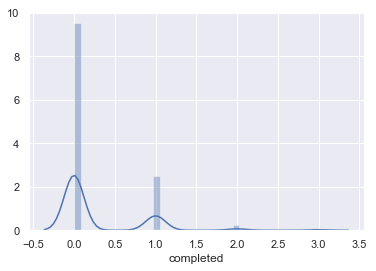

In [240]:
sns.set(color_codes=True)
sns.distplot(result1['completed']);
#distribution

Text(0.5,0.98,'Histogram of Missions Completed')

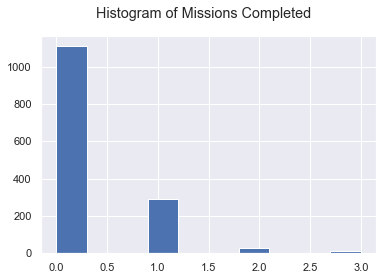

In [421]:
import pylab as pl
result1['completed'].hist()
pl.suptitle("Histogram of Missions Completed")
#Counts 

In [364]:
result2['completed'].value_counts()

0    1109
1     291
2      27
3      10
Name: completed, dtype: int64

In [365]:
cat1 = result1[(result1['completed']==0)]
cat2 = result1[(result1['completed']==2) | (result1['completed']==1)| (result1['completed']==3)| (result1['completed']==4)]

In [366]:

cat1.describe()

idaggregate_info   num_events  num_lark_convo_events  num_meals_logged  \
count       1109.000000  1109.000000            1109.000000       1109.000000   
mean       79114.825068   202.026150              28.082056         13.880072   
std        20228.841048   151.871687              14.128393          7.818857   
min          406.000000    10.000000               0.000000          0.000000   
25%        69885.000000    91.000000              17.000000          8.000000   
50%        84568.000000   161.000000              28.000000         12.000000   
75%        94589.000000   276.000000              37.000000         18.000000   
max       103446.000000  1561.000000              86.000000         50.000000   

       num_breakfasts  num_lunches  num_dinners   num_snacks  total_activity  \
count     1109.000000  1109.000000  1109.000000  1109.000000     1109.000000   
mean         4.049594     4.155095     2.935978     2.739405    24581.160505   
std          2.397779     2.283460     2.361403     3.538301    23413.853864   
min          0.000000     0.000000     0.000000     0.000000        0.000000   
25%          2.000000     3.000000     1.000000     0.000000    10049.000000   
50%          4.000000     4.000000     3.000000     2.000000    18062.000000   
75%          6.000000     6.000000     4.000000     4.000000    31487.000000   
max         17.000000    16.000000    15.000000    20.000000   209488.000000   

       sleep_duration  num_activity_events  num_weights   num_notifs  \
count     1109.000000          1109.000000  1109.000000  1109.000000   
mean    120377.987376           164.323715     1.760144    22.773670   
std      84549.277385           144.417518     2.789582    13.166395   
min          0.000000             0.000000     0.000000     1.000000   
25%      47880.000000            55.000000     1.000000    14.000000   
50%     114673.000000           126.000000     1.000000    20.000000   
75%     177709.000000           233.000000     2.000000    29.000000   
max     480159.000000          1512.000000    46.000000   127.000000   

       idusermission  completed  
count    1109.000000     1109.0  
mean     1224.743012        0.0  
std       379.771856        0.0  
min        35.000000        0.0  
25%       980.000000        0.0  
50%      1257.000000        0.0  
75%      1534.000000        0.0  
max      1811.000000        0.0

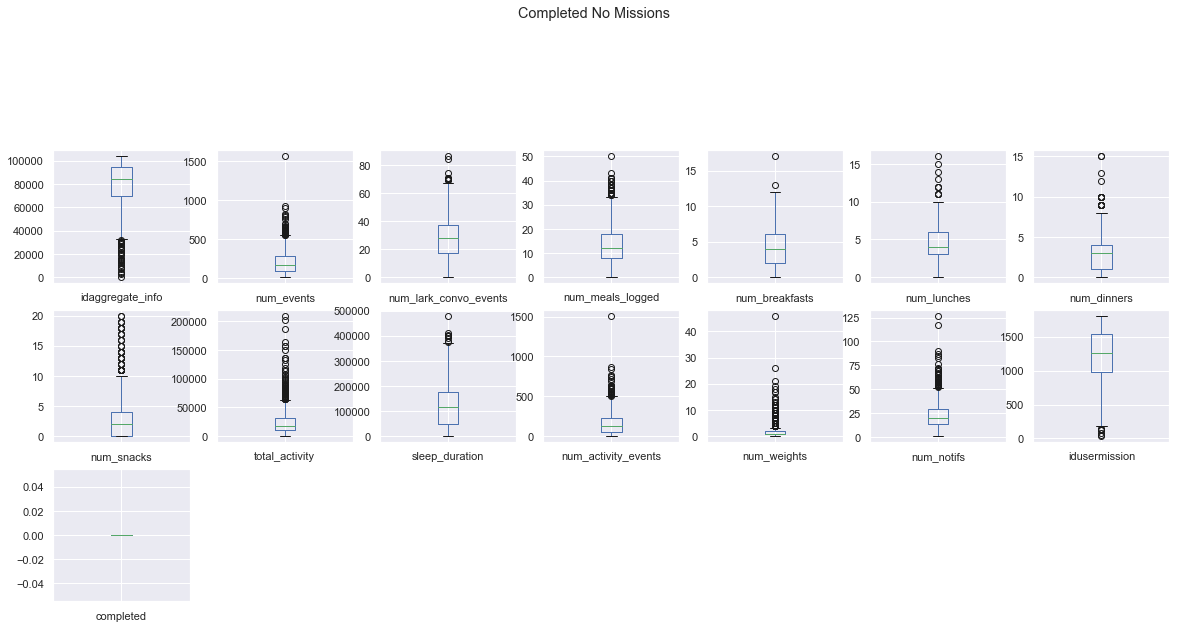

In [423]:
cat1.plot(kind='box', subplots=True, layout=(7,7), sharex=False, sharey=False, figsize=(20,20), 
                                        title='Completed No Missions')
plt.show()

In [368]:
cat2.describe()

idaggregate_info   num_events  num_lark_convo_events  num_meals_logged  \
count        328.000000   328.000000             328.000000        328.000000   
mean       75515.728659   404.817073              50.591463         31.506098   
std        18254.773603   277.611917              22.785750         16.126790   
min         1247.000000    39.000000               9.000000          3.000000   
25%        66790.000000   174.000000              34.000000         21.000000   
50%        76726.500000   360.500000              46.000000         29.000000   
75%        88880.500000   572.000000              63.000000         38.250000   
max       101955.000000  1464.000000             138.000000        115.000000   

       num_breakfasts  num_lunches  num_dinners  num_snacks  total_activity  \
count      328.000000   328.000000   328.000000  328.000000      328.000000   
mean         8.875000     9.003049     6.429878    7.198171    52713.341463   
std          4.546019     4.001145     4.921521    7.914706    40329.760385   
min          0.000000     1.000000     0.000000    0.000000     3131.000000   
25%          6.000000     6.000000     2.000000    1.000000    25150.250000   
50%          8.000000     8.000000     6.000000    5.000000    41367.000000   
75%         11.000000    11.000000    10.000000   11.000000    67983.250000   
max         27.000000    29.000000    31.000000   52.000000   264357.000000   

       sleep_duration  num_activity_events  num_weights  num_notifs  \
count      328.000000           328.000000   328.000000  328.000000   
mean    228756.384146           334.661585     4.475610   44.152439   
std     171847.370685           259.314442     6.585083   21.425383   
min          0.000000             2.000000     0.000000    7.000000   
25%      70515.000000           119.000000     1.000000   30.000000   
50%     235050.000000           287.000000     3.000000   39.500000   
75%     330531.500000           487.250000     5.000000   53.250000   
max     745170.000000          1335.000000    65.000000  155.000000   

       idusermission   completed  
count     328.000000  328.000000  
mean      861.359756    1.143293  
std       475.969410    0.429299  
min         6.000000    1.000000  
25%       460.000000    1.000000  
50%       837.000000    1.000000  
75%      1236.500000    1.000000  
max      1951.000000    3.000000

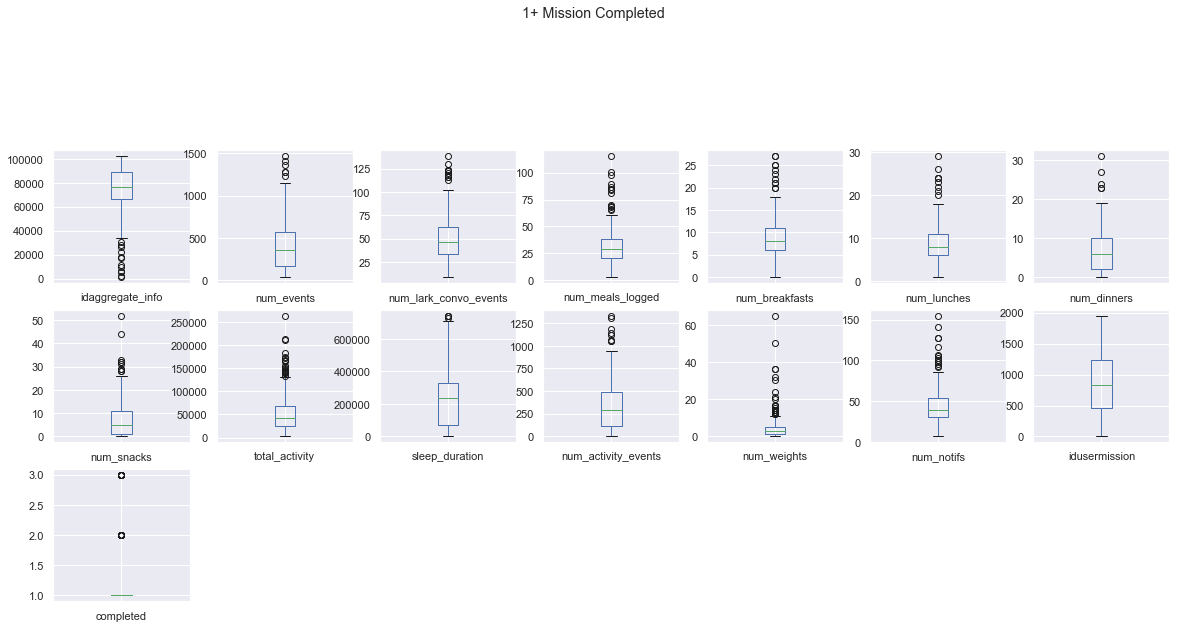

In [424]:
cat2.plot(kind='box', subplots=True, layout=(7,7), sharex=False, sharey=False, figsize=(20,20), 
                                        title='1+ Mission Completed')
plt.show()

Ttest_indResult(statistic=-12.680313928073254, pvalue=4.750989367348445e-31)


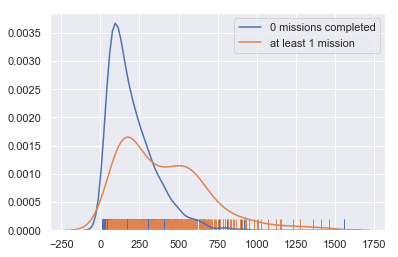

In [380]:
#since we have both unequal populations and unequal variance, let's try a welch's t test, suitable for this situation
#let's see if the vital stats differ strongly between those with completed missions and those without
#then I will see if mission completed in less than n amount of time differ from those who wait longer for their first mission
import seaborn as sns

print(stats.ttest_ind(cat1['num_events'],cat2['num_events'], equal_var = False))
sns.distplot(cat1[['num_events']], hist=False, label = "0 missions completed", rug=True)
sns.distplot(cat2[['num_events']], hist=False, label = "at least 1 mission",rug=True)



#significant

Ttest_indResult(statistic=-16.95319180727278, pvalue=4.451806204805878e-49)


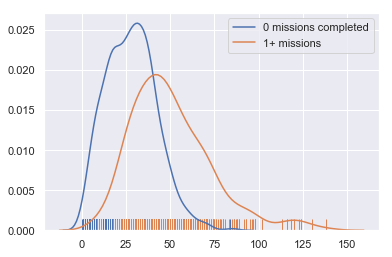

In [381]:
print(stats.ttest_ind(cat1['num_lark_convo_events'],cat2['num_lark_convo_events'], equal_var = False))
sns.distplot(cat1[['num_lark_convo_events']], hist=False, label = "0 missions completed", rug=True)
sns.distplot(cat2[['num_lark_convo_events']], hist=False, label = "1+ missions",rug=True)

#significant

Ttest_indResult(statistic=-19.14027500686766, pvalue=2.132857604431768e-57)


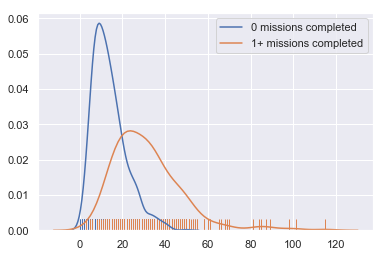

In [382]:
print(stats.ttest_ind(cat1['num_meals_logged'],cat2['num_meals_logged'], equal_var = False))

sns.distplot(cat1[['num_meals_logged']], hist=False, label = "0 missions completed", rug=True)
sns.distplot(cat2[['num_meals_logged']], hist=False, label = "1+ missions completed",rug=True)
#significant

Ttest_indResult(statistic=-12.047036169559082, pvalue=1.1274560435941927e-28)


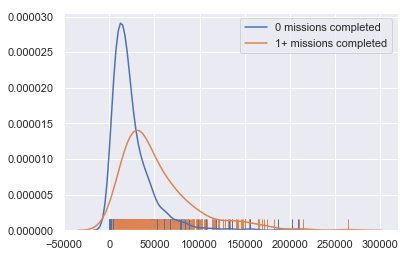

In [383]:
print(stats.ttest_ind(cat1['total_activity'],cat2['total_activity'], equal_var = False))


sns.distplot(cat1[['total_activity']], hist=False, label = "0 missions completed", rug=True)
sns.distplot(cat2[['total_activity']], hist=False, label = "1+ missions completed",rug=True)
#significant

Ttest_indResult(statistic=-11.033711551417575, pvalue=1.0549696689544678e-24)


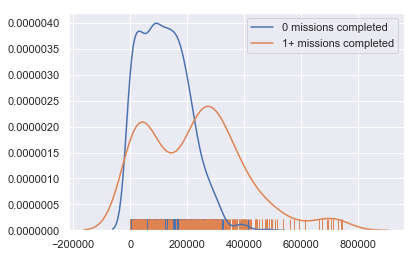

In [384]:
print(stats.ttest_ind(cat1['sleep_duration'],cat2['sleep_duration'], equal_var = False))


sns.distplot(cat1[['sleep_duration']], hist=False, label = "0 missions completed", rug=True)
sns.distplot(cat2[['sleep_duration']], hist=False, label = "1+ missions completed",rug=True)

#significant

Ttest_indResult(statistic=-11.385787737692018, pvalue=4.080351342330764e-26)


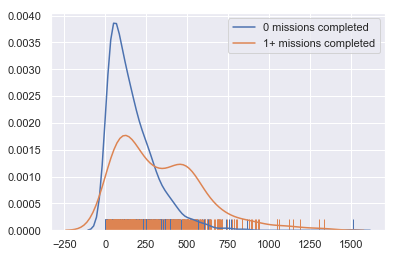

In [385]:
print(stats.ttest_ind(cat1['num_activity_events'],cat2['num_activity_events'], equal_var = False))


sns.distplot(cat1[['num_activity_events']], hist=False, label = "0 missions completed", rug=True)
sns.distplot(cat2[['num_activity_events']], hist=False, label = "1+ missions completed",rug=True)

#significant

In [376]:
#Okay, awesome. All those p values are significant so it can be said that people who engage
#in missions are generally more engaged in the app. Some of those variables are dependent like
#people who complete missions ought to have more conversations that someone with no missions because
#missions involve conversations but the visualizations help show that the average engagement level
#of all the stats goes up, even those not directly conflagrated with mission chat like
#meals logged 

In [377]:
grp = UMdf.groupby('user_id')
df_res = grp['mission_delta'].apply(lambda x: pd.Series(x.values)).unstack()
df_res = df_res.rename(columns={i: 'mission_delta_{}'.format(i + 1) for i in range(len(df_res))})

print(df_res.head())

        mission_delta_1 mission_delta_2 mission_delta_3 mission_delta_4
user_id                                                                
0                   NaT             NaT             NaT             NaT
1       7 days 10:04:28             NaT             NaT             NaT
2       8 days 00:03:05             NaT             NaT             NaT
3                   NaT             NaT             NaT             NaT
4                   NaT             NaT             NaT             NaT


In [378]:
result2 = pd.merge(result1, df_res, on="user_id")

In [379]:
result2.head()

idaggregate_info  num_events  num_lark_convo_events  \
user_id                                                        
0                     406          94                     20   
1                    1247         121                     48   
2                    2088         356                     32   
3                    2929         120                     13   
4                    3770         106                     17   

         num_meals_logged  num_breakfasts  num_lunches  num_dinners  \
user_id                                                               
0                       7               2            2            2   
1                      26               8            7            2   
2                      15               6            6            1   
3                       6               2            2            1   
4                       1               1            0            0   

         num_snacks  total_activity  sleep_duration  num_activity_events  \
user_id                                                                    
0                 1            4456           47738                   72   
1                 9           48695           37560                   53   
2                 2           41598          184113                  314   
3                 1            5381           85212                  102   
4                 0            2737          136014                   84   

         num_weights  num_notifs  idusermission  completed mission_delta_1  \
user_id                                                                      
0                  0          18           1426          0             NaT   
1                 14          48           1379          1 7 days 10:04:28   
2                  1          21            967          1 8 days 00:03:05   
3                  1          13           1585          0             NaT   
4                  1           7           1656          0             NaT   

        mission_delta_2 mission_delta_3 mission_delta_4  
user_id                                                  
0                   NaT             NaT             NaT  
1                   NaT             NaT             NaT  
2                   NaT             NaT             NaT  
3                   NaT             NaT             NaT  
4                   NaT             NaT             NaT

In [315]:
result2['mission_delta_1']= result2['mission_delta_1'].dt.days
result2['mission_delta_2']= result2['mission_delta_2'].dt.days
result2['mission_delta_3'] = result2['mission_delta_3'].dt.days
result2['mission_delta_4']= result2['mission_delta_4'].dt.days

In [316]:
result2.describe()

idaggregate_info   num_events  num_lark_convo_events  num_meals_logged  \
count       1437.000000  1437.000000            1437.000000       1437.000000   
mean       78293.319415   248.313848              33.219903         17.903271   
std        19847.041055   206.386991              19.014738         12.694820   
min          406.000000    10.000000               0.000000          0.000000   
25%        69060.000000   102.000000              20.000000          9.000000   
50%        82610.000000   189.000000              31.000000         15.000000   
75%        93742.000000   330.000000              42.000000         23.000000   
max       103446.000000  1561.000000             138.000000        115.000000   

       num_breakfasts  num_lunches  num_dinners   num_snacks  total_activity  \
count     1437.000000  1437.000000  1437.000000  1437.000000      1437.00000   
mean         5.151009     5.261656     3.733473     3.757133     31002.42380   
std          3.639599     3.436817     3.459769     5.237283     30543.03689   
min          0.000000     0.000000     0.000000     0.000000         0.00000   
25%          3.000000     3.000000     1.000000     0.000000     12014.00000   
50%          4.000000     5.000000     3.000000     2.000000     21486.00000   
75%          7.000000     7.000000     5.000000     5.000000     39498.00000   
max         27.000000    29.000000    31.000000    52.000000    264357.00000   

       sleep_duration  num_activity_events  num_weights   num_notifs  \
count     1437.000000          1437.000000  1437.000000  1437.000000   
mean    145115.714683           203.203897     2.379958    27.653445   
std     119628.899536           191.101381     4.144714    17.856582   
min          0.000000             0.000000     0.000000     1.000000   
25%      51000.000000            64.000000     1.000000    16.000000   
50%     126379.000000           148.000000     1.000000    24.000000   
75%     207664.000000           283.000000     2.000000    34.000000   
max     745170.000000          1512.000000    65.000000   155.000000   

       idusermission    completed  mission_delta_1  mission_delta_2  \
count    1437.000000  1437.000000       328.000000        37.000000   
mean     1141.799582     0.260960         7.018293         8.000000   
std       431.449517     0.521902         1.723990         2.297341   
min         6.000000     0.000000         0.000000         6.000000   
25%       865.000000     0.000000         6.000000         7.000000   
50%      1185.000000     0.000000         7.000000         7.000000   
75%      1489.000000     0.000000         7.000000         8.000000   
max      1951.000000     3.000000        19.000000        16.000000   

       mission_delta_3  mission_delta_4  
count        10.000000              0.0  
mean          6.800000              NaN  
std           0.632456              NaN  
min           6.000000              NaN  
25%           6.250000              NaN  
50%           7.000000              NaN  
75%           7.000000              NaN  
max           8.000000              NaN

In [317]:
#Okay, let's compare mission 1 complete first half to second half 

In [334]:
cat3 = result2[(result2['mission_delta_1']<7)]
cat4 = result2[(result2['mission_delta_1']>=7)]

In [342]:
cat3.describe()

idaggregate_info   num_events  num_lark_convo_events  num_meals_logged  \
count        155.000000   155.000000             155.000000        155.000000   
mean       80030.109677   409.058065              54.677419         34.993548   
std        16318.305553   265.574438              23.301506         17.604787   
min         6293.000000    50.000000              21.000000          9.000000   
25%        71838.500000   196.500000              38.000000         23.000000   
50%        82398.000000   379.000000              51.000000         32.000000   
75%        92235.000000   573.000000              66.500000         43.000000   
max       101955.000000  1278.000000             138.000000        115.000000   

       num_breakfasts  num_lunches  num_dinners  num_snacks  total_activity  \
count      155.000000   155.000000   155.000000  155.000000      155.000000   
mean         9.683871     9.451613     7.103226    8.754839    51456.180645   
std          4.468875     4.117106     5.239924    9.083553    41047.637710   
min          1.000000     2.000000     0.000000    0.000000     3215.000000   
25%          7.000000     7.000000     4.000000    2.000000    24461.500000   
50%          9.000000     9.000000     7.000000    6.000000    36999.000000   
75%         11.000000    11.000000    10.000000   12.000000    66918.500000   
max         27.000000    29.000000    31.000000   52.000000   264357.000000   

       sleep_duration  num_activity_events  num_weights  num_notifs  \
count      155.000000           155.000000   155.000000  155.000000   
mean    215436.161290           335.187097     4.612903   47.470968   
std     170343.002338           245.459992     6.673642   21.840422   
min          0.000000             8.000000     0.000000    7.000000   
25%      55383.500000           124.000000     1.000000   32.000000   
50%     229595.000000           312.000000     3.000000   42.000000   
75%     296340.500000           495.000000     5.000000   58.500000   
max     745170.000000          1146.000000    50.000000  141.000000   

       idusermission   completed  mission_delta_1  mission_delta_2  \
count     155.000000  155.000000       155.000000        19.000000   
mean      985.445161    1.174194         5.961290         6.947368   
std       501.811642    0.498679         0.481932         1.311220   
min         6.000000    1.000000         0.000000         6.000000   
25%       569.000000    1.000000         6.000000         6.000000   
50%       985.000000    1.000000         6.000000         7.000000   
75%      1380.000000    1.000000         6.000000         7.000000   
max      1951.000000    3.000000         6.000000        12.000000   

       mission_delta_3  mission_delta_4  
count          8.00000              0.0  
mean           6.87500              NaN  
std            0.64087              NaN  
min            6.00000              NaN  
25%            6.75000              NaN  
50%            7.00000              NaN  
75%            7.00000              NaN  
max            8.00000              NaN

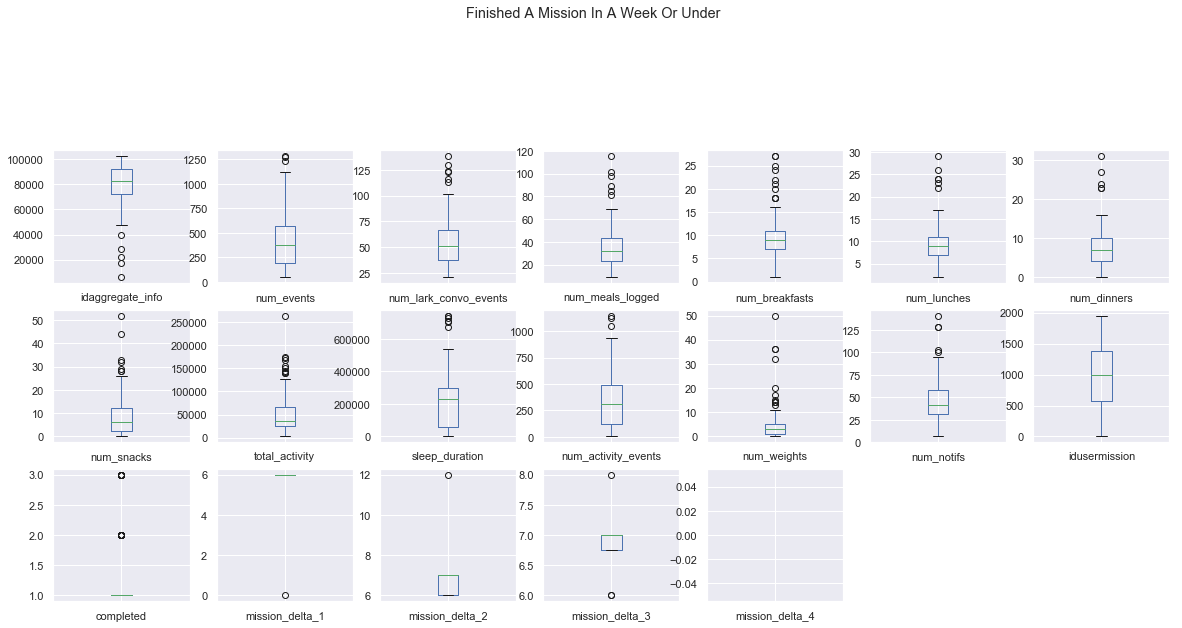

In [425]:
cat3.plot(kind='box', subplots=True, layout=(7,7), sharex=False, sharey=False, figsize=(20,20), 
                                        title='Finished A Mission In A Week Or Under')
plt.show()

In [343]:
cat4.describe()


idaggregate_info   num_events  num_lark_convo_events  num_meals_logged  \
count        173.000000   173.000000             173.000000        173.000000   
mean       71471.052023   401.017341              46.930636         28.381503   
std        18981.506627   288.686751              21.734814         14.005983   
min         1247.000000    39.000000               9.000000          3.000000   
25%        64760.000000   164.000000              32.000000         19.000000   
50%        72566.000000   340.000000              44.000000         26.000000   
75%        83018.000000   562.000000              58.000000         37.000000   
max       100375.000000  1464.000000             124.000000         87.000000   

       num_breakfasts  num_lunches  num_dinners  num_snacks  total_activity  \
count      173.000000   173.000000   173.000000  173.000000      173.000000   
mean         8.150289     8.601156     5.826590    5.803468    53839.699422   
std          4.504579     3.862069     4.548701    6.409168    39761.039091   
min          0.000000     1.000000     0.000000    0.000000     3131.000000   
25%          5.000000     6.000000     2.000000    1.000000    25437.000000   
50%          8.000000     8.000000     5.000000    4.000000    42345.000000   
75%         10.000000    11.000000     9.000000    9.000000    68423.000000   
max         25.000000    24.000000    19.000000   32.000000   214295.000000   

       sleep_duration  num_activity_events  num_weights  num_notifs  \
count      173.000000           173.000000   173.000000  173.000000   
mean    240690.687861           334.190751     4.352601   41.179191   
std     172803.281804           271.838131     6.521651   20.659679   
min          0.000000             2.000000     0.000000    7.000000   
25%      98887.000000           119.000000     1.000000   27.000000   
50%     239100.000000           281.000000     2.000000   37.000000   
75%     350198.000000           481.000000     5.000000   49.000000   
max     740085.000000          1335.000000    65.000000  155.000000   

       idusermission   completed  mission_delta_1  mission_delta_2  \
count     173.000000  173.000000       173.000000        18.000000   
mean      750.184971    1.115607         7.965318         9.111111   
std       423.005004    0.355095         1.879807         2.609685   
min        27.000000    1.000000         7.000000         7.000000   
25%       393.000000    1.000000         7.000000         7.000000   
50%       731.000000    1.000000         7.000000         8.000000   
75%      1097.000000    1.000000         8.000000        10.000000   
max      1645.000000    3.000000        19.000000        16.000000   

       mission_delta_3  mission_delta_4  
count         2.000000              0.0  
mean          6.500000              NaN  
std           0.707107              NaN  
min           6.000000              NaN  
25%           6.250000              NaN  
50%           6.500000              NaN  
75%           6.750000              NaN  
max           7.000000              NaN

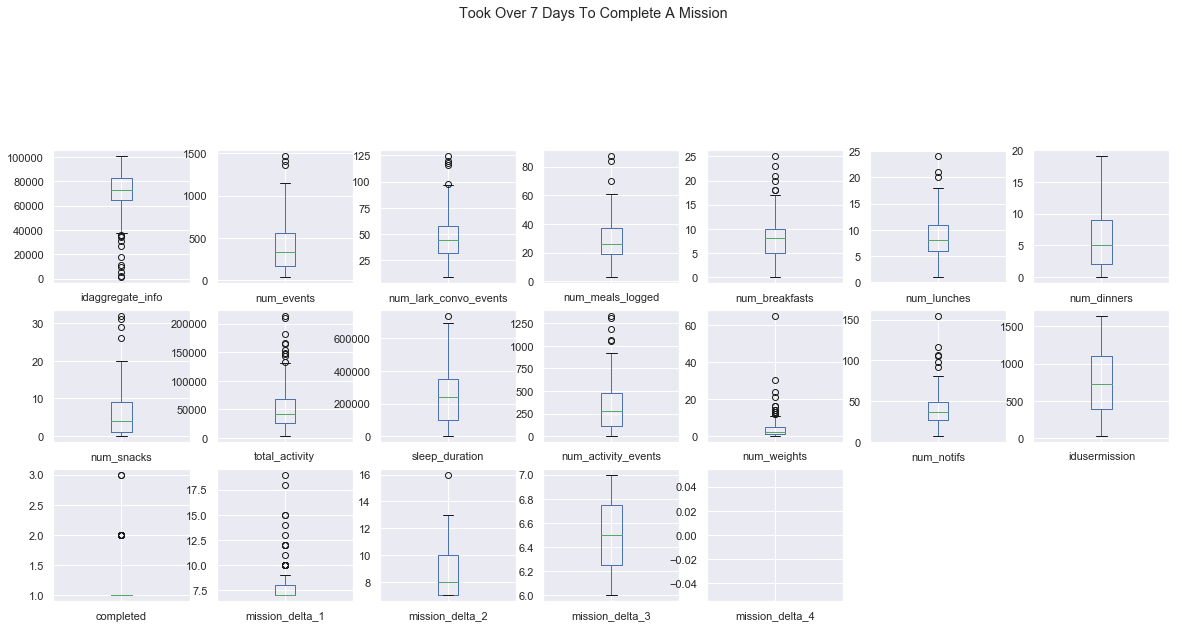

In [426]:
cat4.plot(kind='box', subplots=True, layout=(7,7), sharex=False, sharey=False, figsize=(20,20), 
                                        title='Took Over 7 Days To Complete A Mission')
plt.show()

Ttest_indResult(statistic=0.26151070587508757, pvalue=0.7938638355344272)


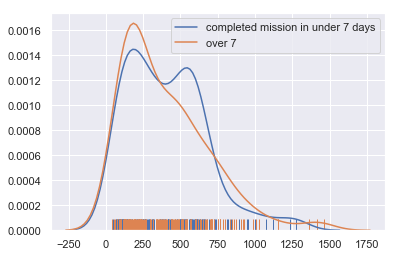

In [350]:
#Since there are rougly equal sample sizes and variances, we can use a regular t test

print(stats.ttest_ind(cat3['num_events'],cat4['num_events']))
sns.distplot(cat3[['num_events']], hist=False, label = "completed mission in under 7 days", rug=True)
sns.distplot(cat4[['num_events']], hist=False, label = "over 7",rug=True)


#Not significant 

Ttest_indResult(statistic=3.1146743467022118, pvalue=0.002004907695352776)


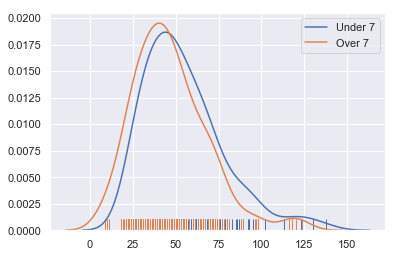

In [351]:
print(stats.ttest_ind(cat3['num_lark_convo_events'],cat4['num_lark_convo_events']))
sns.distplot(cat3[['num_lark_convo_events']], hist=False, label = "Under 7", rug=True)
sns.distplot(cat4[['num_lark_convo_events']], hist=False, label = "Over 7",rug=True)

#Significant 

Ttest_indResult(statistic=3.7817973111822356, pvalue=0.0001851810238245603)


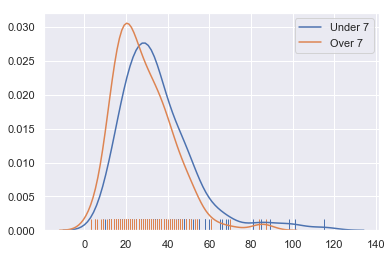

In [352]:
print(stats.ttest_ind(cat3['num_meals_logged'],cat4['num_meals_logged']))

sns.distplot(cat3[['num_meals_logged']], hist=False, label = "Under 7", rug=True)
sns.distplot(cat4[['num_meals_logged']], hist=False, label = "Over 7",rug=True)
#Significant

Ttest_indResult(statistic=-0.533788909873226, pvalue=0.593851357173126)


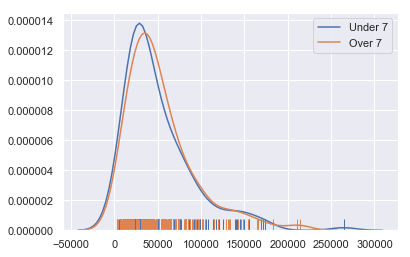

In [353]:
print(stats.ttest_ind(cat3['total_activity'],cat4['total_activity']))


sns.distplot(cat3[['total_activity']], hist=False, label = "Under 7", rug=True)
sns.distplot(cat4[['total_activity']], hist=False, label = "Over 7",rug=True)

#Not significant

Ttest_indResult(statistic=-1.3303284934398414, pvalue=0.18433992879990016)


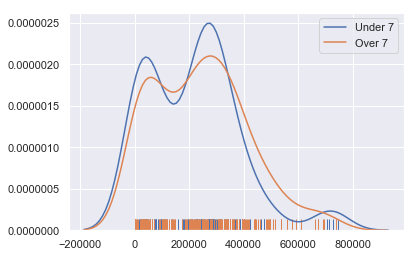

In [354]:
print(stats.ttest_ind(cat3['sleep_duration'],cat4['sleep_duration']))


sns.distplot(cat3[['sleep_duration']], hist=False, label = "Under 7", rug=True)
sns.distplot(cat4[['sleep_duration']], hist=False, label = "Over 7",rug=True)

#Not significant

Ttest_indResult(statistic=0.034687331290881473, pvalue=0.9723502918900568)


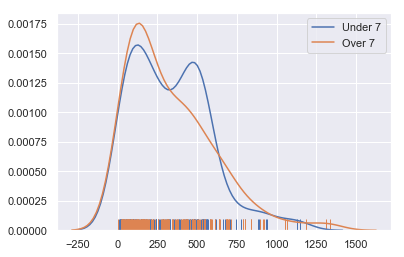

In [356]:
print(stats.ttest_ind(cat3['num_activity_events'],cat4['num_activity_events']))


sns.distplot(cat3[['num_activity_events']], hist=False, label = "Under 7", rug=True)
sns.distplot(cat4[['num_activity_events']], hist=False, label = "Over 7",rug=True)

#Not significant

Ttest_indResult(statistic=1.2349209279930164, pvalue=0.2177492461279206)


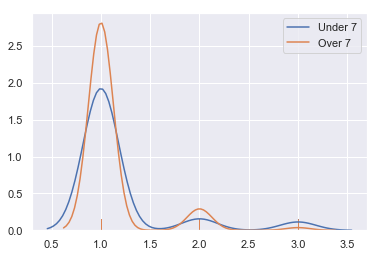

In [357]:
print(stats.ttest_ind(cat3['completed'],cat4['completed']))


sns.distplot(cat3[['completed']], hist=False, label = "Under 7", rug=True)
sns.distplot(cat4[['completed']], hist=False, label = "Over 7",rug=True)

#not significant 